## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [3]:
f = '../out.hdf5'
#f1 = '/data/submit/jinw65/SUEP/wj_2017/ScoutingPFHT+Run2017E-v1+RAW/62EF7861-7CA5-E711-A0FC-02163E01475A.hdf5'
#f1 = '/data/submit/akanugan/SUEP/afterHLTfix17/QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8+RunIISummer20UL17RECO-106X_mc2017_realistic_v6-v2+AODSIM/64352BE2-6241-3649-9FAA-35F7B4129C78.hdf5'
#f1 = '/data/submit/akanugan/SUEP/full17/ScoutingPFHT+Run2017F-v1+RAW/3210C370-E7B8-E711-9F33-02163E019C38.hdf5'
#f1 = '/data/submit/akanugan/SUEP/new_vars3/ScoutingPFHT+Run2018A-v1+RAW/6AC48EAA-A256-E811-9C6B-02163E019FF4.hdf5' #run 316187
#f1 = '/data/submit/akanugan/SUEP/new_vars3/ScoutingPFHT+Run2018A-v1+RAW/6AD2C777-A256-E811-9AE7-FA163E0F11D0.hdf5'
f1 = '/data/submit/akanugan/SUEP/new_vars3/ScoutingPFHT+Run2018A-v1+RAW/3ADD6F29-E449-E811-96C9-FA163E7841DC.hdf5'#run 315267
df,m  = h5load(f1, 'vars')
m

{'era': '2018', 'mc': 0, 'sample': 'ScoutingPFHT+Run2018A-v1+RAW'}

In [4]:
df.keys()

Index(['event', 'run', 'lumi', 'ntracks', 'ngood_fastjets', 'ht', 'ht_JEC',
       'ht_JEC_JER_up', 'ht_JEC_JER_down', 'ht_JEC_JES_up', 'ht_JEC_JES_down',
       'n_sel_electrons', 'n_sel_muons', 'n_sel_leps', 'ngood_ak4jets',
       'PV_npvs', 'SUEP_genMass', 'SUEP_genPt', 'SUEP_genEta', 'SUEP_genPhi',
       'SUEP_nconst_CL', 'SUEP_pt_avg_b_CL', 'SUEP_S1_CL', 'SUEP_pt_avg_CL',
       'SUEP_pt_CL', 'SUEP_eta_CL', 'SUEP_phi_CL', 'SUEP_mass_CL',
       'SUEP_delta_mass_genMass_CL', 'SUEP_delta_pt_genPt_CL',
       'SUEP_genEta_diff_CL', 'SUEP_genPhi_diff_CL', 'SUEP_genR_diff_CL',
       'ISR_nconst_CL', 'ISR_pt_avg_b_CL', 'ISR_S1_CL', 'ISR_pt_avg_CL',
       'ISR_pt_CL', 'ISR_eta_CL', 'ISR_phi_CL', 'ISR_mass_CL'],
      dtype='object')

In [7]:
df['lumi']

0       184
1       184
2       184
3       184
4       184
       ... 
9885    209
9886    209
9887    209
9888    209
9889    209
Name: lumi, Length: 197799, dtype: uint32

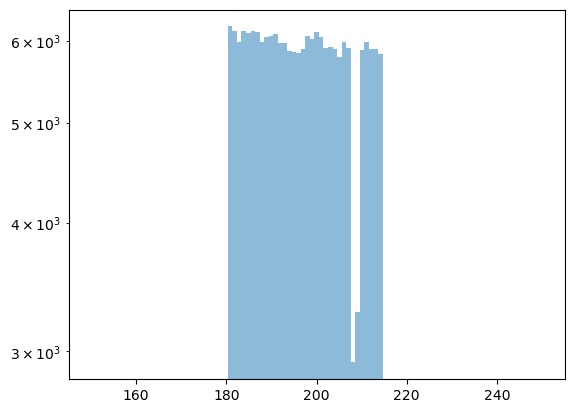

In [9]:
_ = plt.hist(df['lumi'], alpha=0.5, bins=np.linspace(150,250,100))
plt.yscale('log')

In [19]:
pd.set_option('display.max_columns', None)
df[df['ht_JEC']>0].describe()

,ntracks,ngood_fastjets,ht,ht_JEC,ht_JEC_JER_up,ht_JEC_JER_down,ht_JEC_JES_up,ht_JEC_JES_down,n_sel_electrons,n_sel_muons,n_sel_leps,ngood_ak4jets,PV_npvs,SUEP_genMass,SUEP_genPt,SUEP_genEta,SUEP_genPhi,SUEP_nconst_CL,SUEP_pt_avg_b_CL,SUEP_S1_CL,SUEP_pt_avg_CL,SUEP_pt_CL,SUEP_eta_CL,SUEP_phi_CL,SUEP_mass_CL,SUEP_delta_mass_genMass_CL,SUEP_delta_pt_genPt_CL,SUEP_genEta_diff_CL,SUEP_genPhi_diff_CL,SUEP_genR_diff_CL,ISR_nconst_CL,ISR_pt_avg_b_CL,ISR_S1_CL,ISR_pt_avg_CL,ISR_pt_CL,ISR_eta_CL,ISR_phi_CL,ISR_mass_CL
count,436758.000000,436758.000000,436758.000000,436758.000000,436758.000000,436758.000000,436758.000000,436758.000000,436758.000000,436758.0,436758.000000,436758.000000,436758.000000,436758.0,436758.0,436758.0,436758.0,141942.000000,141942.000000,1.419420e+05,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000,1.419420e+05,141942.000000,141942.000000,141942.000000,141942.000000,141942.000000
mean,19.263475,1.072596,504.200641,529.702336,529.702336,529.702336,529.702336,529.702336,0.464697,0.0,0.464697,3.682305,17.799704,0.0,0.0,0.0,0.0,14.496400,2.014848,3.341620e-01,8.761105,112.173204,-0.001763,-0.091657,39.520547,39.520547,112.173204,-0.001763,-0.091657,1.689109,8.644813,1.903831,2.589356e-01,13.642896,96.252067,-0.033698,0.009261,23.189235
std,10.583146,0.805355,140.345625,151.405562,151.405562,151.405562,151.405562,151.405562,0.776455,0.0,0.776455,1.340394,5.458363,0.0,0.0,0.0,0.0,5.313087,1.140362,1.860664e-01,4.389156,47.712818,0.767331,1.710508,26.349501,26.349501,47.712818,0.767331,1.710508,0.818492,3.883926,1.447565,1.850588e-01,9.143187,43.268394,1.045065,1.881049,18.356244
min,0.000000,0.000000,224.132599,236.665756,236.665756,236.665756,236.665756,236.665756,0.000000,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.000000,0.087115,-8.326673e-17,2.290690,50.000851,-2.320234,-3.141512,0.468390,0.468390,50.000851,-2.320234,-3.141512,0.003285,2.000000,0.007694,-5.828671e-16,2.319590,50.000067,-2.475258,-3.141535,0.244926
25%,12.000000,0.000000,416.401581,436.110741,436.110741,436.110741,436.110741,436.110741,0.000000,0.0,0.000000,3.000000,14.000000,0.0,0.0,0.0,0.0,11.000000,1.237569,1.848386e-01,5.904485,76.898079,-0.575453,-1.557653,21.259843,21.259843,76.898079,-0.575453,-1.557653,1.017909,6.000000,0.963935,1.098968e-01,7.959971,64.538802,-0.881449,-1.743495,10.506898
50%,19.000000,1.000000,466.576294,487.789597,487.789597,487.789597,487.789597,487.789597,0.000000,0.0,0.000000,4.000000,17.000000,0.0,0.0,0.0,0.0,14.000000,1.779455,3.120879e-01,7.684505,102.346783,0.007163,-0.134660,33.449563,33.449563,102.346783,0.007163,-0.134660,1.627075,8.000000,1.586521,2.224647e-01,11.064146,83.893541,-0.039115,0.058831,19.054448
75%,26.000000,2.000000,546.656784,574.130554,574.130554,574.130554,574.130554,574.130554,1.000000,0.0,1.000000,4.000000,21.000000,0.0,0.0,0.0,0.0,18.000000,2.512774,4.661225e-01,10.325899,135.800606,0.572100,1.262523,51.012426,51.012426,135.800606,0.572100,1.262523,2.379502,11.000000,2.444864,3.792110e-01,16.274413,114.986159,0.827646,1.639735,30.866783
max,88.000000,4.000000,3397.760254,3555.769775,3555.769775,3555.769775,3555.769775,3555.769775,10.000000,0.0,10.000000,15.000000,67.000000,0.0,0.0,0.0,0.0,52.000000,27.152134,9.457397e-01,101.059239,606.984897,2.313026,3.141579,367.662552,367.662552,606.984897,2.313026,3.141579,3.751724,37.000000,125.230684,9.311157e-01,304.372060,608.749339,2.401535,3.141570,311.115328


In [60]:
a = original_order['ht_JEC']
b = new_order['ht_JEC']

print(len(a), len(b))

aa = a[a > 1200]
bb = b[b > 1200]

print(len(aa), len(bb))

2152 2152
1314 1312


In [5]:
f = '/data/submit/cms/store/user/lavezzo/SUEP/feb23/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_0.hdf5'
event_vars, m = h5load(f,'vars')
f = '/data/submit/cms/store/user/lavezzo/SUEP/feb23/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_1.hdf5'
event_vars_2, m = h5load(f,'vars')

In [6]:
f = '/data/submit/cms/store/user/lavezzo/SUEP/inference7_SUEPtracks/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_0.hdf5'
event_vars_3, m = h5load(f,'vars')
f = '/data/submit/cms/store/user/lavezzo/SUEP/inference7_SUEPtracks/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD/merged/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_merged_1.hdf5'
event_vars_4, m = h5load(f,'vars')

In [7]:
new = pd.concat([event_vars, event_vars_2])
old = pd.concat([event_vars_3, event_vars_4])

In [8]:
new = new[new['ht_JEC']>1200]
old = old[old['ht_JEC']>1200]

In [9]:
print(new.shape)
print(old.shape)

(5191549, 43)
(5294924, 38)


In [18]:
import plot_utils

# ran these over old data
# original = old make_plots
# new = new make_plots
p0 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_sys_studies_v3.pkl')
p1 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original.pkl')
p5 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new.pkl')
p2 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC.pkl')
p6 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_JEC.pkl')
p3 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC_newRegions.pkl')

# this is running over new data
# the latter has the old regions, ht > 1200
p4 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_feb23_v2.pkl')
p7 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_newNtuples.pkl')

In [77]:
# ran these over old data
# original = old make_plots
# new = new make_plots
sample = 'QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madgraph-pythia8+RunIISummer20UL18MiniAODv2-106X_upgrade2018_realistic_v16_L1v1-v1+MINIAODSIM'
q0 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/'+sample+'_sys_studies_v3.pkl')
#p1 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original.pkl')
#p5 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new.pkl')
#p2 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC.pkl')
#p6 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_JEC.pkl')
#p3 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_original_JEC_newRegions.pkl')

# this is running over new data
# the latter has the old regions, ht > 1200
q4 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/'+sample+'_feb23_v2.pkl')
#p7 = plot_utils.openpkl('/work/submit/lavezzo/SUEP/outputs/JetHT+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_new_newNtuples.pkl')

1.0000000000000906


(0.5, 1.5)

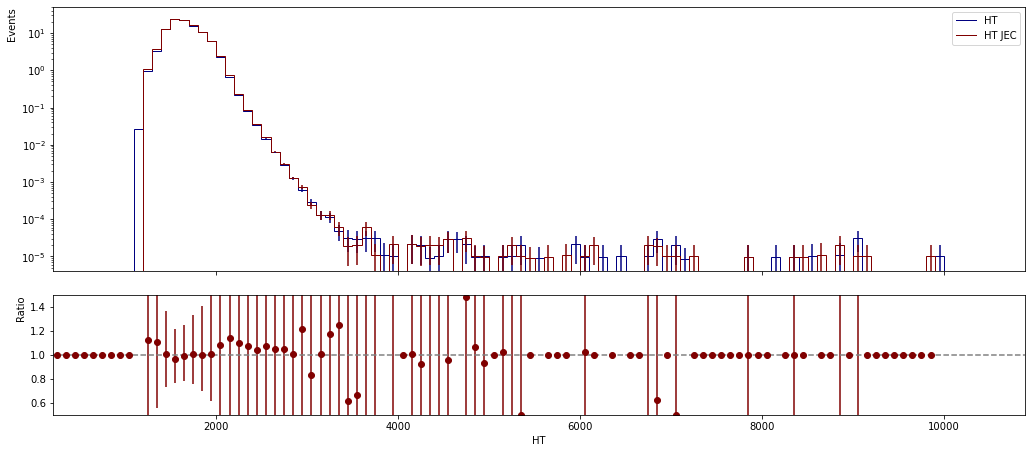

In [80]:
h1 = q4['ht_Cluster70']
h2 = q4['ht_JEC_Cluster70']

print(h1.sum().value/h2.sum().value)

fig, axs = plot_utils.plot_ratio([h1,h2], labels=['HT','HT JEC'])
fig.set_size_inches(18.5, 10.5)
axs[1].set_ylim(0.5, 1.5)

Text(0.5, 0, '# Leptons')

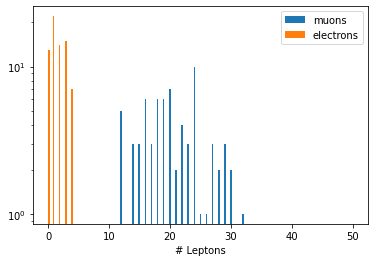

In [16]:
x = event_vars['n_sel_leps']
m = event_vars['n_sel_muons']
e = event_vars['n_sel_electrons']
#_= plt.hist(x+1, bins=np.linspace(0,50,200), label='total')
_= plt.hist(m, bins=np.linspace(0,50,200), label='muons')
_= plt.hist(e, bins=np.linspace(0,50,200), label='electrons')
plt.yscale('log')
plt.legend()
plt.xlabel("# Leptons")

64909205.15625
64774388.28125


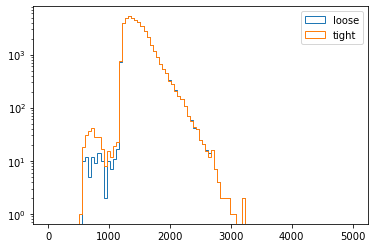

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))